<a href="https://colab.research.google.com/github/corralem/MITFutureMakers/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers

encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation = "relu")(input_img)
decoded = layers.Dense(784,activation = 'sigmoid')(encoded) 

autoencoder = keras.Model(input_img,decoded)

In [2]:
#encoder = keras.Model(input_img,encoded)
#encoded_input = keras.Input(shape=(encoding_dim,))
#decoder_layer = layers.Dense(784, activation='sigmoid')
#decoder = keras.Model()

In [3]:
autoencoder.compile(optimizer='adam',loss ='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(X_train, _),(X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape, X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784) (10000, 784)


In [5]:
autoencoder.fit(X_train,X_train,epochs=5,batch_size=256, shuffle = True, validation_data=(X_test,X_test))
# try batch sizes 32 64 and 128 later 
#trying epochs 10, 50, 1000 later as well

Epoch 1/5
235/235 [==============================] - 17s 6ms/step - loss: 0.3844 - val_loss: 0.1889
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1793 - val_loss: 0.1523
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1484 - val_loss: 0.1324
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1306 - val_loss: 0.1195
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1184 - val_loss: 0.1107


In [6]:
#Visualization will come later 

In [7]:
from keras.datasets import mnist
import numpy as np
(X_train, _),(X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

X_train = X_train.reshape((len(X_train), X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((len(X_test), X_test.shape[1], X_test.shape[2],1))
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy,0.0,1.0)
X_test_noisy = np.clip(X_test_noisy,0.0,1.0)

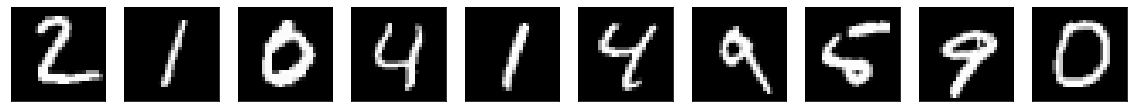

In [12]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

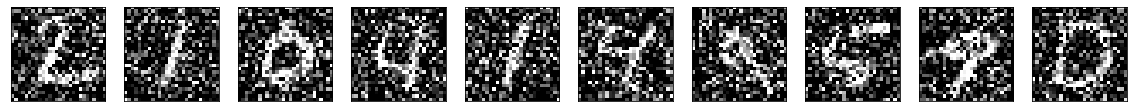

In [11]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(X_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
input_img = keras.Input(shape=(28,28,1))
#encoder
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPool2D((2,2), padding='same')(x) 
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPool2D((2,2), padding='same')(x)

#decoder
x = layers.Conv2D(32,(3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3,3),activation='sigmoid', padding='same')(x)

#autoencoder
autoencoder = keras.Model(input_img,decoded) # autoencoder defined
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy') #compiled autoencoder


In [17]:
autoencoder.fit(X_train_noisy, X_train, epochs=5, batch_size=256, shuffle=True, validation_data=(X_test,X_test))

Epoch 1/5
235/235 [==============================] - 33s 25ms/step - loss: 0.3078 - val_loss: 0.1017
Epoch 2/5
235/235 [==============================] - 5s 23ms/step - loss: 0.1248 - val_loss: 0.0907
Epoch 3/5
235/235 [==============================] - 5s 23ms/step - loss: 0.1161 - val_loss: 0.0877
Epoch 4/5
235/235 [==============================] - 5s 23ms/step - loss: 0.1124 - val_loss: 0.0851
Epoch 5/5
235/235 [==============================] - 5s 23ms/step - loss: 0.1099 - val_loss: 0.0846


AttributeError: ignored

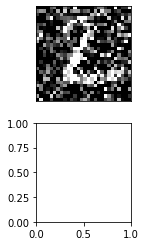

In [21]:
import tensorflow as tf


n = 10
plt.figure(figsize=(20,4))
for i in range(1, n + 1):
  #Display original
  ax = plt.subplot(2, n, 1)
  plt.imshow(X_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display reconstruction
  ax = plt.subplot(2, n, i + n)
  plt.imshow(tf.make_ndarray(decoded[i]).reshape(28,28))
  plt.gray()
  ax.get_xaxis.set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()